## Import Data ##

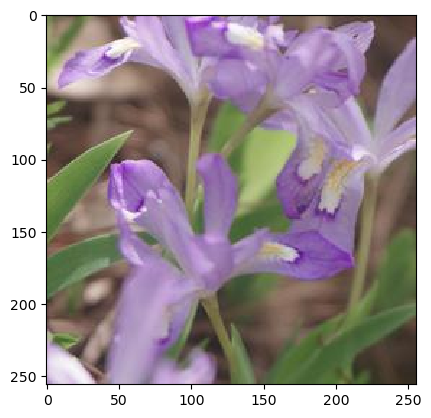

(421, 256, 256, 3)

In [762]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
import cv2
import random

images1 = [cv2.imread(file) for file in glob.glob("iris-setosa/*.jpg")]

image_files = glob.glob("iris-versicolour/*.jpg")
sampled_files = random.sample(image_files, round(len(image_files)))
images2 = [cv2.imread(file) for file in sampled_files]

images3 = [cv2.imread(file) for file in glob.glob("iris-virginica/*.jpg")]

images = images1+images2+images3

df = np.array(images)
plt.imshow(df[80][:, :, (2, 1, 0)], interpolation='nearest')
plt.show()
df.shape

In [764]:
print(len(images1), len(images2), len(images3))

67 269 85


In [766]:
img_len1 = len(images1)
img_len1y2 = len(images1)+len(images2)
img_len1y2y3 = len(images1)+len(images2)+len(images3)

In [768]:
size = int(df.size/len(df))
df = df.reshape(-1,size)
df = pd.DataFrame(df)

In [770]:
df["Iris"] = ["setosa" if i < img_len1 else "versicolour" if i < img_len1y2 else "virginica" for i in range(img_len1y2y3)]
df

,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,Iris
0,156,197,170,155,196,169,151,194,167,150,...,57,99,76,58,100,77,59,101,78,setosa
1,29,62,47,32,65,50,35,68,53,37,...,27,96,51,30,102,50,27,102,48,setosa
2,115,211,157,114,210,156,118,212,158,112,...,52,185,128,35,167,107,58,190,130,setosa
3,0,101,52,0,94,42,2,85,30,8,...,0,72,28,0,66,22,0,65,21,setosa
4,241,124,169,241,126,169,246,134,176,250,...,0,54,16,0,52,13,0,51,12,setosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,76,81,80,78,83,82,80,85,84,82,...,25,84,86,19,82,86,14,81,84,virginica
417,30,121,106,35,126,111,42,130,116,42,...,0,64,45,3,64,44,8,67,47,virginica
418,216,217,215,216,217,215,216,217,215,216,...,199,199,199,192,192,192,202,202,202,virginica
419,41,144,93,41,144,93,40,145,94,41,...,23,132,76,27,136,80,28,139,83,virginica


In [772]:
df.loc[[67]]

,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,Iris
67,16,11,10,16,11,10,17,12,11,18,...,2,4,4,2,4,4,2,4,4,versicolour


In [774]:
X = df.drop(columns=["Iris"])
y = df["Iris"]

## Data Clean Up ##

In [776]:
from sklearn.preprocessing import StandardScaler

object = StandardScaler()
df = object.fit_transform(X) 

## Data Analysis ##

## Data Optimization ##

In [ ]:
import numpy as np

a = round(196607/3)
z = round((196607*3)/2) #When dealing with the last column type the column #+1, (who tf knows why but it works)
d = df.iloc[0:420, a:z] #[Rows, Columns]
vec_df = np.dot(d, 3) #Operations to weight data

#re-inserting weighted data back into the dataset
v = pd.DataFrame(vec_df, columns = df.columns[a:z].tolist())
df.update(v)

In [ ]:
#Undo previous operation
a = 196607/3
z = (196607*3)/2
d = df.iloc[0:3, a:z] #[Rows, Columns]
vec_df = np.dot(d, 1/3) #Operations to weight data

In [ ]:
df

## Fine-Tuning ##

In [780]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [786]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1;, score=0.667 total time=   0.7s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1;, score=0.655 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1;, score=0.655 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=2;, score=0.667 total time=   0.6s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=2;, score=0.655 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=2;, score=0.655 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=4;, score=0.667 total time=   0.6s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=4;, score=0.655 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=4;, score=0.655 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=20, min_samples_leaf=1;, score=0.667 total t

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_grid = DecisionTreeClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(dt_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

In [784]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid = parameter, cv = kf, verbose = 1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 26}


## Training and Testing ##

In [790]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

model1 = RandomForestClassifier(max_depth = 3, min_samples_leaf = 40, min_samples_split = 2).fit(X_train, y_train)

predictions = model1.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.6:
    joblib.dump(model1, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.6094674556213018


In [794]:
from sklearn.tree import DecisionTreeClassifier
import joblib

model2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10, min_samples_split = 2).fit(X_train, y_train)

predictions = model2.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.6:
    joblib.dump(model2, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.514792899408284


In [813]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

model3 = KNeighborsClassifier(n_neighbors=26).fit(X_train, y_train)

score = model3.score(X_test, y_test)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.6:
    joblib.dump(model3, "test3.joblib")
    model = joblib.load("test3.joblib")

Accuracy: 0.6153846153846154


In [811]:
from sklearn import svm
import joblib

model4 = svm.SVC().fit(X_train, y_train)

predictions = model4.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.5:
    joblib.dump(model4, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.6094674556213018


## Predicted vs Actual ##

In [815]:
from PIL import Image

img = Image.open("Iris_versicolor2.jpg")
img_resize = img.resize((256,256))
im = np.array(img_resize).reshape(1,-1)

In [817]:
#If it was standardized earlier use this
object = StandardScaler()
im_norm = object.fit_transform(im) 

In [819]:
predictions = model.predict(im)
print(predictions)

['versicolour']


In [825]:
y_predicted = model.predict(X_test)

In [827]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[  1,  29,   0],
       [  0, 103,   0],
       [  0,  36,   0]])

Text(95.72222222222221, 0.5, 'Actual')

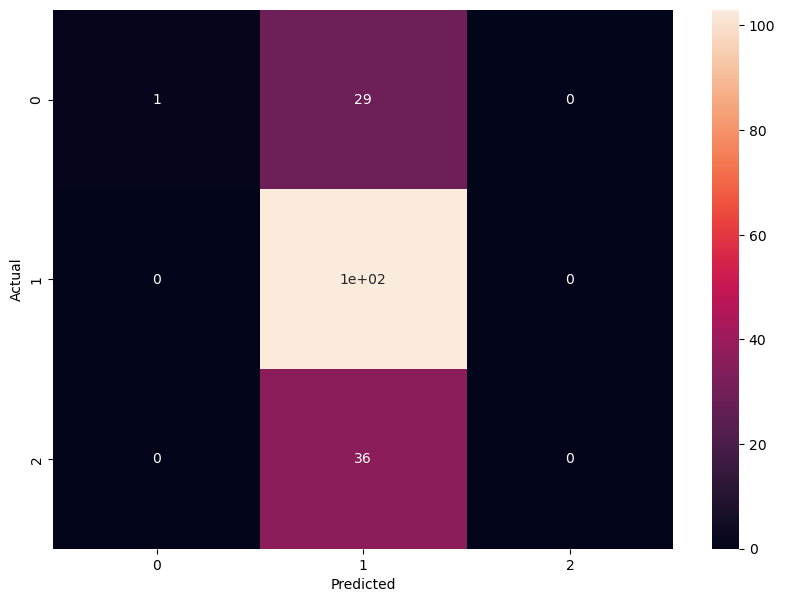

In [829]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")